In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
data = pd.read_excel("maliciousornot.xlsx")

In [3]:
data

,Type,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,...,SOURCE_I,SOURCE_J,SOURCE_K,SOURCE_M,SOURCE_L,SOURCE_N,SOURCE_O,SOURCE_P,SOURCE_R,SOURCE_S
0,1,23.303047,13.445560,159.066933,1296.628667,0.153367,0.359585,0.388730,0.190544,0.313341,...,32.875560,22.448127,239.118533,2615.278000,0.210103,0.862174,0.922148,0.343781,0.595983,0.154015
1,1,26.645007,23.018073,172.149800,1717.612000,0.109767,0.101865,0.112564,0.090894,0.234714,...,32.370380,30.323753,205.698933,2533.672000,0.160362,0.241709,0.312953,240.932000,356.216667,0.115311
2,1,25.505113,27.525833,168.393333,1558.286000,0.141969,0.207124,0.255699,0.165673,0.268004,...,30.531007,33.069860,197.538333,2213.724667,0.187046,0.549869,0.583418,314.766000,0.468004,0.113445
3,1,14.792707,26.398893,100.491960,500.128200,0.184585,0.367745,0.312693,0.136269,0.336398,...,19.313420,34.326333,128.069607,735.360733,0.271761,1.122147,0.889764,0.333548,0.859842,224.092667
4,1,26.282313,18.575080,174.999533,1680.047333,0.129922,0.172020,256.476000,0.135103,0.234326,...,29.196813,21.593207,197.149733,2040.150000,0.177979,265.543333,0.518133,0.210492,0.306217,0.099456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
543,1,27.927387,29.002513,183.937333,1915.798000,143.782000,0.150129,0.315932,0.179922,0.223575,...,32.966233,34.196800,215.154867,2625.640667,182.642000,0.273704,0.531993,0.287046,266.838667,0.092163
544,1,26.075060,36.593167,169.947733,1633.415333,0.126684,0.133937,186.528000,0.126826,0.226942,...,30.686447,49.546500,200.776667,2242.222000,0.151036,0.248963,0.416450,0.210880,0.333160,0.085971
545,1,21.502533,36.372960,140.284600,1111.525533,0.109520,0.132513,0.119831,0.068679,205.958000,...,24.585427,44.196773,164.118733,1455.954667,0.147538,0.400776,0.440802,0.183678,0.287305,0.101295
546,1,26.683867,37.992127,181.476200,1638.596667,0.152590,358.807333,0.455180,196.890667,0.310491,...,33.341880,51.062040,239.118533,2358.802000,213.730000,1.124479,1.215929,343.263333,0.529403,160.621333


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Type                       548 non-null    int64  
 1   URL_LENGTH                 548 non-null    float64
 2   NUMBER_SPECIAL_CHARACTERS  548 non-null    float64
 3   TCP_CONVERSATION_EXCHANGE  548 non-null    float64
 4   DIST_REMOTE_TCP_PORT       548 non-null    float64
 5   REMOTE_IPS                 548 non-null    float64
 6   APP_BYTES                  548 non-null    float64
 7   SOURCE_APP_PACKETS         548 non-null    float64
 8   REMOTE_APP_PACKETS         548 non-null    float64
 9   SOURCE_APP_BYTES           548 non-null    float64
 10  REMOTE_APP_BYTES           548 non-null    float64
 11  APP_PACKETS                548 non-null    float64
 12  DNS_QUERY_TIMES            548 non-null    float64
 13  SOURCE_A                   548 non-null    float64

In [5]:
data.describe()

,Type,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,...,SOURCE_I,SOURCE_J,SOURCE_K,SOURCE_M,SOURCE_L,SOURCE_N,SOURCE_O,SOURCE_P,SOURCE_R,SOURCE_S
count,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,...,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000
mean,0.383212,949.973475,25.015747,119.725438,857.123249,5.785481,6.499737,10.069604,3.181365,22.809689,...,399.714125,33.295952,139.830855,1155.666380,14.295530,32.855845,34.913670,11.758580,40.829159,2.637820
std,0.486613,3202.802599,5.605685,31.842845,461.579998,27.796268,35.390031,46.976527,21.315640,70.942060,...,2117.405314,7.956699,44.017609,746.777340,49.075477,126.026487,149.880701,52.045464,119.531119,19.086225
min,0.000000,10.051787,12.577687,56.722647,185.880333,0.068173,0.025104,0.000000,0.000000,0.151165,...,10.271993,15.569907,65.297753,239.895733,0.105246,0.044456,0.000000,0.000000,0.202720,0.071295
25%,0.000000,15.838688,20.987638,97.470595,544.622900,0.112309,0.084718,0.038394,0.026383,0.211755,...,17.082208,27.325057,108.999062,667.971017,0.154501,0.196275,0.152558,0.084805,0.331022,0.093099
50%,0.000000,18.069900,24.423510,112.920683,723.637967,0.125084,0.122720,0.085395,0.045304,0.235168,...,19.838030,32.972710,127.117537,901.616767,0.173899,0.297149,0.328950,0.132318,0.374869,0.103743
75%,1.000000,23.264187,28.270650,137.175800,1037.270550,0.137694,0.172215,0.189799,0.101201,0.266159,...,25.919620,38.698083,164.636867,1460.488333,0.194689,0.497797,0.559098,0.223866,0.430342,0.119375
max,1.000000,12828.981333,50.880693,244.170333,3239.628667,159.326000,358.807333,405.439333,209.844000,393.781333,...,12928.722000,64.170813,325.387733,5510.348000,239.636667,1370.462667,1621.757333,376.942000,704.661333,224.092667


In [6]:
data.corr()["Type"].sort_values()

URL_LENGTH                  -0.228422
SOURCE_I                    -0.138708
SOURCE_B                    -0.128587
SOURCE_APP_BYTES            -0.086080
SOURCE_C                    -0.075369
REMOTE_APP_BYTES            -0.048806
SOURCE_G                    -0.017433
DNS_QUERY_TIMES             -0.011055
SOURCE_F                    -0.007551
SOURCE_E                     0.001985
SOURCE_L                     0.022932
SOURCE_D                     0.029479
SOURCE_H                     0.055045
SOURCE_O                     0.063622
SOURCE_R                     0.069140
SOURCE_N                     0.088076
APP_BYTES                    0.096659
REMOTE_IPS                   0.126232
SOURCE_APP_PACKETS           0.129433
REMOTE_APP_PACKETS           0.139874
SOURCE_S                     0.141134
SOURCE_P                     0.205141
APP_PACKETS                  0.240818
NUMBER_SPECIAL_CHARACTERS    0.412095
SOURCE_J                     0.453197
SOURCE_A                     0.536539
DIST_REMOTE_

In [7]:
import seaborn as sbn

<AxesSubplot:xlabel='Type', ylabel='count'>

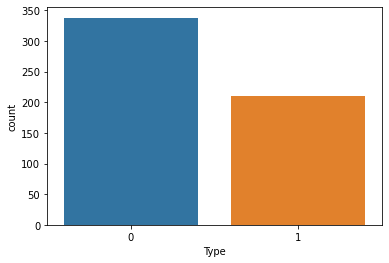

In [9]:
sbn.countplot(x= "Type", data = data)

<AxesSubplot:>

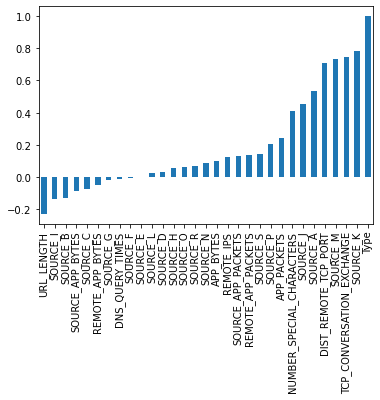

In [10]:
data.corr()["Type"].sort_values().plot(kind="bar")

In [13]:
y = data["Type"].values
x = data.drop("Type", axis = 1).values

In [14]:
from sklearn.model_selection import train_test_split


In [15]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=15)

In [16]:
from sklearn.preprocessing import MinMaxScaler

In [17]:
sc=MinMaxScaler()

In [18]:
sc.fit(x_train)

MinMaxScaler()

In [19]:
x_train = sc.transform(x_train)

In [20]:
x_test=sc.transform(x_test)

In [21]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [23]:
x_train.shape

(383, 30)

In [25]:
model = Sequential()

model.add(Dense(units=30,activation = "relu"))
model.add(Dense(units=15,activation = "relu"))
model.add(Dense(units=15,activation = "relu"))
model.add(Dense(units=1,activation = "sigmoid"))

model.compile(loss="binary_crossentropy",optimizer="adam")
#loss sınıflandırmaya göre seçildi


In [27]:
model.fit(x=x_train, y=y_train, epochs=700 , validation_data=(x_test,y_test),verbose=
         1)

Epoch 1/700
12/12 [==============================] - 1s 19ms/step - loss: 0.6823 - val_loss: 0.6862
Epoch 2/700
12/12 [==============================] - 0s 8ms/step - loss: 0.6669 - val_loss: 0.6740
Epoch 3/700
12/12 [==============================] - 0s 9ms/step - loss: 0.6488 - val_loss: 0.6574
Epoch 4/700
12/12 [==============================] - 0s 8ms/step - loss: 0.6242 - val_loss: 0.6360
Epoch 5/700
12/12 [==============================] - 0s 6ms/step - loss: 0.5951 - val_loss: 0.6083
Epoch 6/700
12/12 [==============================] - 0s 8ms/step - loss: 0.5530 - val_loss: 0.5698
Epoch 7/700
12/12 [==============================] - 0s 9ms/step - loss: 0.5002 - val_loss: 0.5219
Epoch 8/700
12/12 [==============================] - 0s 6ms/step - loss: 0.4427 - val_loss: 0.4690
Epoch 9/700
12/12 [==============================] - 0s 7ms/step - loss: 0.3825 - val_loss: 0.4244
Epoch 10/700
12/12 [==============================] - 0s 6ms/step - loss: 0.3325 - val_loss: 0.3946
Epoch 11

Epoch 83/700
12/12 [==============================] - 0s 7ms/step - loss: 0.0525 - val_loss: 0.2551
Epoch 84/700
12/12 [==============================] - 0s 7ms/step - loss: 0.0525 - val_loss: 0.2469
Epoch 85/700
12/12 [==============================] - 0s 6ms/step - loss: 0.0519 - val_loss: 0.2528
Epoch 86/700
12/12 [==============================] - 0s 7ms/step - loss: 0.0525 - val_loss: 0.2446
Epoch 87/700
12/12 [==============================] - 0s 8ms/step - loss: 0.0654 - val_loss: 0.2676
Epoch 88/700
12/12 [==============================] - 0s 8ms/step - loss: 0.0508 - val_loss: 0.2475
Epoch 89/700
12/12 [==============================] - 0s 7ms/step - loss: 0.0498 - val_loss: 0.2572
Epoch 90/700
12/12 [==============================] - 0s 6ms/step - loss: 0.0528 - val_loss: 0.2425
Epoch 91/700
12/12 [==============================] - 0s 6ms/step - loss: 0.0488 - val_loss: 0.2488
Epoch 92/700
12/12 [==============================] - 0s 7ms/step - loss: 0.0480 - val_loss: 0.2437


12/12 [==============================] - 0s 6ms/step - loss: 0.0311 - val_loss: 0.2268
Epoch 165/700
12/12 [==============================] - 0s 6ms/step - loss: 0.0303 - val_loss: 0.2290
Epoch 166/700
12/12 [==============================] - 0s 6ms/step - loss: 0.0237 - val_loss: 0.2257
Epoch 167/700
12/12 [==============================] - 0s 6ms/step - loss: 0.0220 - val_loss: 0.2303
Epoch 168/700
12/12 [==============================] - 0s 6ms/step - loss: 0.0240 - val_loss: 0.2253
Epoch 169/700
12/12 [==============================] - 0s 5ms/step - loss: 0.0215 - val_loss: 0.2279
Epoch 170/700
12/12 [==============================] - 0s 6ms/step - loss: 0.0218 - val_loss: 0.2287
Epoch 171/700
12/12 [==============================] - 0s 5ms/step - loss: 0.0209 - val_loss: 0.2273
Epoch 172/700
12/12 [==============================] - 0s 6ms/step - loss: 0.0212 - val_loss: 0.2306
Epoch 173/700
12/12 [==============================] - 0s 6ms/step - loss: 0.0203 - val_loss: 0.2293
Epoc

12/12 [==============================] - 0s 7ms/step - loss: 0.0090 - val_loss: 0.2333
Epoch 246/700
12/12 [==============================] - 0s 7ms/step - loss: 0.0114 - val_loss: 0.2374
Epoch 247/700
12/12 [==============================] - 0s 7ms/step - loss: 0.0085 - val_loss: 0.2341
Epoch 248/700
12/12 [==============================] - 0s 7ms/step - loss: 0.0086 - val_loss: 0.2366
Epoch 249/700
12/12 [==============================] - 0s 8ms/step - loss: 0.0095 - val_loss: 0.2366
Epoch 250/700
12/12 [==============================] - 0s 7ms/step - loss: 0.0091 - val_loss: 0.2333
Epoch 251/700
12/12 [==============================] - 0s 7ms/step - loss: 0.0079 - val_loss: 0.2350
Epoch 252/700
12/12 [==============================] - 0s 6ms/step - loss: 0.0077 - val_loss: 0.2380
Epoch 253/700
12/12 [==============================] - 0s 6ms/step - loss: 0.0083 - val_loss: 0.2329
Epoch 254/700
12/12 [==============================] - 0s 6ms/step - loss: 0.0075 - val_loss: 0.2354
Epoc

12/12 [==============================] - 0s 9ms/step - loss: 0.0037 - val_loss: 0.2548
Epoch 327/700
12/12 [==============================] - 0s 7ms/step - loss: 0.0033 - val_loss: 0.2545
Epoch 328/700
12/12 [==============================] - 0s 7ms/step - loss: 0.0034 - val_loss: 0.2545
Epoch 329/700
12/12 [==============================] - 0s 8ms/step - loss: 0.0035 - val_loss: 0.2529
Epoch 330/700
12/12 [==============================] - 0s 9ms/step - loss: 0.0035 - val_loss: 0.2582
Epoch 331/700
12/12 [==============================] - 0s 9ms/step - loss: 0.0033 - val_loss: 0.2545
Epoch 332/700
12/12 [==============================] - 0s 7ms/step - loss: 0.0035 - val_loss: 0.2551
Epoch 333/700
12/12 [==============================] - 0s 7ms/step - loss: 0.0033 - val_loss: 0.2557
Epoch 334/700
12/12 [==============================] - 0s 7ms/step - loss: 0.0038 - val_loss: 0.2566
Epoch 335/700
12/12 [==============================] - 0s 8ms/step - loss: 0.0030 - val_loss: 0.2568
Epoc

12/12 [==============================] - 0s 7ms/step - loss: 0.0019 - val_loss: 0.2884
Epoch 408/700
12/12 [==============================] - 0s 8ms/step - loss: 0.0018 - val_loss: 0.3052
Epoch 409/700
12/12 [==============================] - 0s 7ms/step - loss: 0.0021 - val_loss: 0.2995
Epoch 410/700
12/12 [==============================] - 0s 8ms/step - loss: 0.0016 - val_loss: 0.2954
Epoch 411/700
12/12 [==============================] - 0s 8ms/step - loss: 0.0016 - val_loss: 0.2982
Epoch 412/700
12/12 [==============================] - 0s 7ms/step - loss: 0.0015 - val_loss: 0.2965
Epoch 413/700
12/12 [==============================] - 0s 7ms/step - loss: 0.0014 - val_loss: 0.2937
Epoch 414/700
12/12 [==============================] - 0s 7ms/step - loss: 0.0014 - val_loss: 0.2979
Epoch 415/700
12/12 [==============================] - 0s 7ms/step - loss: 0.0014 - val_loss: 0.2950
Epoch 416/700
12/12 [==============================] - 0s 6ms/step - loss: 0.0015 - val_loss: 0.3021
Epoc

12/12 [==============================] - 0s 7ms/step - loss: 0.0014 - val_loss: 0.3918
Epoch 489/700
12/12 [==============================] - 0s 7ms/step - loss: 0.0014 - val_loss: 0.3915
Epoch 490/700
12/12 [==============================] - 0s 8ms/step - loss: 0.0015 - val_loss: 0.3936
Epoch 491/700
12/12 [==============================] - 0s 9ms/step - loss: 0.0013 - val_loss: 0.3926
Epoch 492/700
12/12 [==============================] - 0s 7ms/step - loss: 0.0015 - val_loss: 0.3946
Epoch 493/700
12/12 [==============================] - 0s 7ms/step - loss: 0.0014 - val_loss: 0.3944
Epoch 494/700
12/12 [==============================] - 0s 8ms/step - loss: 0.0014 - val_loss: 0.3948
Epoch 495/700
12/12 [==============================] - 0s 6ms/step - loss: 0.0013 - val_loss: 0.3970
Epoch 496/700
12/12 [==============================] - 0s 8ms/step - loss: 0.0013 - val_loss: 0.3957
Epoch 497/700
12/12 [==============================] - 0s 7ms/step - loss: 0.0014 - val_loss: 0.3964
Epoc

12/12 [==============================] - 0s 6ms/step - loss: 8.5190e-04 - val_loss: 0.4179
Epoch 569/700
12/12 [==============================] - 0s 6ms/step - loss: 8.6284e-04 - val_loss: 0.4176
Epoch 570/700
12/12 [==============================] - 0s 7ms/step - loss: 8.7602e-04 - val_loss: 0.4190
Epoch 571/700
12/12 [==============================] - 0s 8ms/step - loss: 8.5231e-04 - val_loss: 0.4167
Epoch 572/700
12/12 [==============================] - 0s 7ms/step - loss: 8.0635e-04 - val_loss: 0.4188
Epoch 573/700
12/12 [==============================] - 0s 7ms/step - loss: 9.1831e-04 - val_loss: 0.4178
Epoch 574/700
12/12 [==============================] - 0s 9ms/step - loss: 8.7987e-04 - val_loss: 0.4184
Epoch 575/700
12/12 [==============================] - 0s 7ms/step - loss: 8.7109e-04 - val_loss: 0.4186
Epoch 576/700
12/12 [==============================] - 0s 8ms/step - loss: 8.1506e-04 - val_loss: 0.4221
Epoch 577/700
12/12 [==============================] - 0s 7ms/step - 

12/12 [==============================] - 0s 6ms/step - loss: 6.4865e-04 - val_loss: 0.4474
Epoch 647/700
12/12 [==============================] - 0s 6ms/step - loss: 5.3985e-04 - val_loss: 0.4500
Epoch 648/700
12/12 [==============================] - 0s 6ms/step - loss: 7.6673e-04 - val_loss: 0.4489
Epoch 649/700
12/12 [==============================] - 0s 6ms/step - loss: 5.7200e-04 - val_loss: 0.4501
Epoch 650/700
12/12 [==============================] - 0s 5ms/step - loss: 5.6816e-04 - val_loss: 0.4518
Epoch 651/700
12/12 [==============================] - 0s 7ms/step - loss: 5.4438e-04 - val_loss: 0.4510
Epoch 652/700
12/12 [==============================] - 0s 6ms/step - loss: 5.3160e-04 - val_loss: 0.4524
Epoch 653/700
12/12 [==============================] - 0s 6ms/step - loss: 5.3570e-04 - val_loss: 0.4545
Epoch 654/700
12/12 [==============================] - 0s 6ms/step - loss: 5.6815e-04 - val_loss: 0.4536
Epoch 655/700
12/12 [==============================] - 0s 6ms/step - 

In [28]:
model.history.history

{'loss': [0.6823214888572693,
  0.666893720626831,
  0.6487995982170105,
  0.6242212653160095,
  0.5951244235038757,
  0.5529810190200806,
  0.5001915097236633,
  0.44274869561195374,
  0.3824714422225952,
  0.33246156573295593,
  0.2899187505245209,
  0.2542237937450409,
  0.22894932329654694,
  0.20911648869514465,
  0.19469764828681946,
  0.18002307415008545,
  0.17113138735294342,
  0.16050589084625244,
  0.15345902740955353,
  0.14700795710086823,
  0.1411701887845993,
  0.1365739107131958,
  0.13023744523525238,
  0.12735365331172943,
  0.12609237432479858,
  0.11839709430932999,
  0.11506219208240509,
  0.11443914473056793,
  0.10913801193237305,
  0.10819146037101746,
  0.10835447162389755,
  0.10273020714521408,
  0.09931520372629166,
  0.1019853800535202,
  0.1002095490694046,
  0.09794454276561737,
  0.09432841092348099,
  0.09463809430599213,
  0.09084739536046982,
  0.08946290612220764,
  0.08800219744443893,
  0.08831947296857834,
  0.08662044256925583,
  0.08358808606863

In [29]:
model_loss=pd.DataFrame(model.history.history)

<AxesSubplot:>

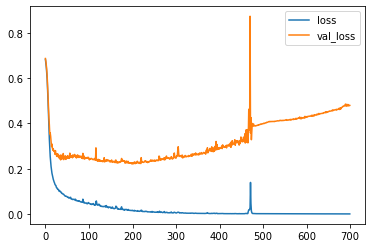

In [30]:
model_loss.plot()

In [31]:
#val_loss saçma artış varsa early stop yapılır

In [32]:
model = Sequential()

model.add(Dense(units=30,activation = "relu"))
model.add(Dense(units=15,activation = "relu"))
model.add(Dense(units=15,activation = "relu"))
model.add(Dense(units=1,activation = "sigmoid"))

model.compile(loss="binary_crossentropy",optimizer="adam")


In [36]:
early_stopping=EarlyStopping(monitor="val_loss", mode="min",verbose=1,patience=25)

In [37]:
model.fit(x=x_train, y=y_train, epochs=700, validation_data = (x_test,y_test), verbose=1, callbacks=[early_stopping])

Epoch 1/700
12/12 [==============================] - 1s 19ms/step - loss: 0.6858 - val_loss: 0.6783
Epoch 2/700
12/12 [==============================] - 0s 6ms/step - loss: 0.6573 - val_loss: 0.6627
Epoch 3/700
12/12 [==============================] - 0s 7ms/step - loss: 0.6315 - val_loss: 0.6475
Epoch 4/700
12/12 [==============================] - 0s 5ms/step - loss: 0.6045 - val_loss: 0.6317
Epoch 5/700
12/12 [==============================] - 0s 7ms/step - loss: 0.5731 - val_loss: 0.6010
Epoch 6/700
12/12 [==============================] - 0s 8ms/step - loss: 0.5335 - val_loss: 0.5698
Epoch 7/700
12/12 [==============================] - 0s 6ms/step - loss: 0.4898 - val_loss: 0.5331
Epoch 8/700
12/12 [==============================] - 0s 6ms/step - loss: 0.4418 - val_loss: 0.4859
Epoch 9/700
12/12 [==============================] - 0s 7ms/step - loss: 0.3933 - val_loss: 0.4525
Epoch 10/700
12/12 [==============================] - 0s 6ms/step - loss: 0.3458 - val_loss: 0.4188
Epoch 11

12/12 [==============================] - 0s 7ms/step - loss: 0.0535 - val_loss: 0.2164
Epoch 84/700
12/12 [==============================] - 0s 7ms/step - loss: 0.0549 - val_loss: 0.2193
Epoch 85/700
12/12 [==============================] - 0s 7ms/step - loss: 0.0538 - val_loss: 0.2180
Epoch 86/700
12/12 [==============================] - 0s 7ms/step - loss: 0.0533 - val_loss: 0.2167
Epoch 87/700
12/12 [==============================] - 0s 9ms/step - loss: 0.0536 - val_loss: 0.2156
Epoch 88/700
12/12 [==============================] - 0s 7ms/step - loss: 0.0543 - val_loss: 0.2171
Epoch 89/700
12/12 [==============================] - 0s 9ms/step - loss: 0.0516 - val_loss: 0.2181
Epoch 90/700
12/12 [==============================] - 0s 8ms/step - loss: 0.0527 - val_loss: 0.2139
Epoch 91/700
12/12 [==============================] - 0s 7ms/step - loss: 0.0564 - val_loss: 0.2228
Epoch 92/700
12/12 [==============================] - 0s 6ms/step - loss: 0.0523 - val_loss: 0.2152
Epoch 93/700


In [38]:
model_loss=pd.DataFrame(model.history.history)

<AxesSubplot:>

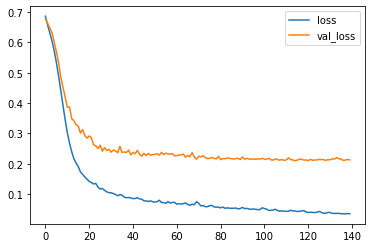

In [39]:
model_loss.plot()

In [41]:
#dropout (belirli layerlar atılacak)

In [42]:
model = Sequential()

model.add(Dense(units=30,activation = "relu"))
model.add(Dropout(0.5))

model.add(Dense(units=15,activation = "relu"))
model.add(Dropout(0.5))

model.add(Dense(units=15,activation = "relu"))
model.add(Dropout(0.5))

model.add(Dense(units=1,activation = "sigmoid"))

model.compile(loss="binary_crossentropy",optimizer="adam")

In [43]:
model.fit(x=x_train, y=y_train, epochs=700, validation_data = (x_test,y_test), verbose=1, callbacks=[early_stopping])

Epoch 1/700
12/12 [==============================] - 1s 20ms/step - loss: 0.7015 - val_loss: 0.6900
Epoch 2/700
12/12 [==============================] - 0s 11ms/step - loss: 0.6834 - val_loss: 0.6879
Epoch 3/700
12/12 [==============================] - 0s 10ms/step - loss: 0.6895 - val_loss: 0.6867
Epoch 4/700
12/12 [==============================] - 0s 10ms/step - loss: 0.6791 - val_loss: 0.6857
Epoch 5/700
12/12 [==============================] - 0s 7ms/step - loss: 0.6748 - val_loss: 0.6841
Epoch 6/700
12/12 [==============================] - 0s 9ms/step - loss: 0.6725 - val_loss: 0.6835
Epoch 7/700
12/12 [==============================] - 0s 7ms/step - loss: 0.6714 - val_loss: 0.6817
Epoch 8/700
12/12 [==============================] - 0s 8ms/step - loss: 0.6609 - val_loss: 0.6787
Epoch 9/700
12/12 [==============================] - 0s 8ms/step - loss: 0.6563 - val_loss: 0.6718
Epoch 10/700
12/12 [==============================] - 0s 7ms/step - loss: 0.6508 - val_loss: 0.6615
Epoch

Epoch 83/700
12/12 [==============================] - 0s 9ms/step - loss: 0.1793 - val_loss: 0.2510
Epoch 84/700
12/12 [==============================] - 0s 8ms/step - loss: 0.1809 - val_loss: 0.2478
Epoch 85/700
12/12 [==============================] - 0s 8ms/step - loss: 0.1962 - val_loss: 0.2462
Epoch 86/700
12/12 [==============================] - 0s 8ms/step - loss: 0.1821 - val_loss: 0.2518
Epoch 87/700
12/12 [==============================] - 0s 9ms/step - loss: 0.1805 - val_loss: 0.2503
Epoch 88/700
12/12 [==============================] - 0s 8ms/step - loss: 0.2072 - val_loss: 0.2554
Epoch 89/700
12/12 [==============================] - 0s 8ms/step - loss: 0.1741 - val_loss: 0.2513
Epoch 89: early stopping


In [44]:
loss_df=pd.DataFrame(model.history.history)

<AxesSubplot:>

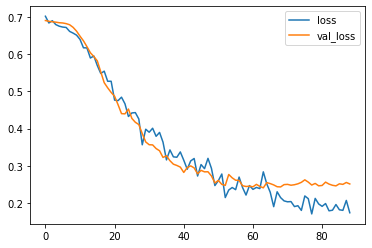

In [45]:
loss_df.plot()

In [79]:
#predicts = model.predict_classes(x_test)
#y_predict = np.argmax(model.predict(x_test), axis=1)
y_predict = (model.predict(x_test) > 0.5).astype("int32") #binary için

6/6 [==============================] - 0s 3ms/step


In [80]:
y_predict

array([[0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
    

In [66]:
from sklearn.metrics import classification_report, confusion_matrix

In [81]:
y_predict.shape

(165, 1)

In [84]:


print(classification_report(y_test, y_predict))

print(confusion_matrix(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91        91
           1       0.91      0.86      0.89        74

    accuracy                           0.90       165
   macro avg       0.90      0.90      0.90       165
weighted avg       0.90      0.90      0.90       165

[[85  6]
 [10 64]]
